# Lab2- Logistic Regression and  Batch Stochastic Gradient Descent

## (1) Import and devide dataset.

In [29]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

#x_train, y_train = load_svmlight_file(f=BytesIO(r.content), n_features=123)
x_train,y_train = load_svmlight_file("a9a", n_features=123)
x_train= x_train.toarray()

x_test,y_test = load_svmlight_file("a9a.t", n_features=123)
x_test=x_test.toarray()

In [30]:
# preprocess the dateset
import numpy

n_samples, n_features = x_train.shape
x_train = numpy.column_stack((x_train, numpy.ones((n_samples, 1))))
x_test = numpy.column_stack((x_test, numpy.ones((x_test.shape[0], 1))))

y_train = y_train.reshape((-1, 1))
y_test=y_test.reshape(y_test.shape[0],1)

y_train[y_train==-1]=0
y_test[y_test==-1]=0

## (2) Initialize linear model parameters.
- theta is a n*1 matrix, otherwise there will be a number of errors during matrix operation.
- alpha, representing learning rate, should be small enough.

In [31]:

alpha = 0.008 #learning rate
maxIteration = 300
Threshold=0.5
batch=128
train_loss, test_loss,train_accr,test_accr = [],[],[],[]

In [32]:
#theta = numpy.zeros((n_features + 1, 1))  # initialize with zeros
#theta = numpy.random.random((n_features+1 , 1))  # initialize with random numbers
theta = numpy.random.normal(0.1, 0.1, size=(n_features + 1, 1))  # initialize with zero normal distribution

## (3) Choose loss function and calculate loss
## (4) Batch Stochastic Gradient Descent

In [33]:
def sigmoid(a):
    return 1/(1+numpy.exp(-a))

def MSGD(w):
    sumG=0
    for i in range(0,batch):
        i=numpy.random.randint(0,n_samples)
        sumG+=(x_train[i].T * (sigmoid(x_train[i] * w) - y_train[i]))
    sumG/=batch
    return sumG

def cal_loss(x,y,theta):
    sigm=sigmoid(numpy.dot(x,theta))
    return  -numpy.average( y*numpy.log(sigm) + (1-y)*numpy.log(1-sigm) )


def cal_accur(x,y,theta):
    hypothesis =sigmoid( numpy.dot(x , theta))
    hypothesis[hypothesis > Threshold] = 1
    hypothesis[hypothesis <= Threshold] = 0
    return numpy.count_nonzero(hypothesis==y)/ x.shape[0]


def SGD(theta):
    for i in range(0, maxIteration):
        gradient = MSGD(theta)
        theta = theta - alpha * gradient 
        
        train_loss.append(cal_loss(x_train,y_train,theta))
        test_loss.append(cal_loss(x_test,y_test,theta))
        train_accr.append(cal_accur(x_train,y_train,theta))
        test_accr.append(cal_accur(x_test,y_test,theta))

SGD(theta)
print(train_loss[len(train_loss)-1])
print(test_loss[len(test_loss)-1])



1.1249082409140874
1.12577182400026


## (5) Draw graph
- The blue line represents the loss of train, and the orange line represents the loss of eva

The best accuracy for train set is  45.29910015048678
The best accuracy for evaluation set is  45.00669492045943


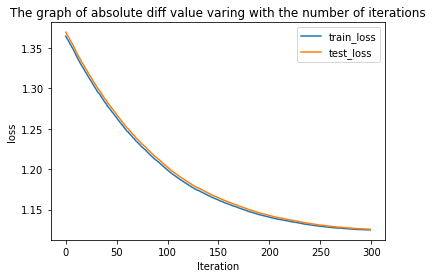

In [34]:
#draw picture
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot( train_loss, label="train_loss")
plt.plot( test_loss,label="test_loss" )
plt.legend(loc="upper right")
plt.title("The graph of absolute diff value varing with the number of iterations")


print("The best accuracy for train set is " ,max(train_accr))
print("The best accuracy for evaluation set is " ,max(test_accr))
